In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from keras.layers import Input, Dense, BatchNormalization, Dropout, PReLU
from keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# calculate the mse loss
from sklearn.metrics import mean_squared_error

training frac parameters

In [2]:
num_low = 500
num_high = 5000
num_test = 20

# input data 
design parameters

In [62]:
# use gaussian distribution to generate data
d1_low = np.random.normal(loc=200, scale=5, size=num_low)
d2_low = np.random.normal(loc=20, scale=5, size=num_low)
d3_low = np.random.normal(loc=210, scale=40, size=num_low)
d4_low = np.random.normal(loc=1000, scale=50, size=num_low)
d5_low = np.random.normal(loc=0.1, scale=0.05, size=num_low)

# make a dataframe with the data
df_de_low = pd.DataFrame({'c_1': d1_low, 
                        'c_2': d2_low, 
                        'c_3': d3_low, 
                        'c_4': d4_low, 
                        'c_5': d5_low})

# use gaussian distribution to generate data
d1_high = np.random.normal(loc=400, scale=50, size= num_high)
d2_high = np.random.normal(loc=40, scale=5, size= num_high)
d3_high = np.random.normal(loc=390, scale=50, size= num_high)
d4_high = np.random.normal(loc=2000, scale=100, size= num_high)
d5_high = np.random.normal(loc=0.5, scale=0.1, size= num_high)

# make a dataframe with the data
df_de_high = pd.DataFrame({'c_1': d1_high,
                        'c_2': d2_high,
                        'c_3': d3_high,
                        'c_4': d4_high,
                        'c_5': d5_high})

situation parameters

In [63]:

# use gaussian distribution to generate data
s1_low = np.random.normal(loc=20, scale=2, size= num_low)
s2_low = np.random.normal(loc=8.7, scale=2, size= num_low)
s3_low = np.random.normal(loc=0.5, scale=0.1, size= num_low)
s4_low = np.random.normal(loc=0.5, scale=0.1, size= num_low)
s5_low = np.random.normal(loc=5, scale=1, size= num_low)


df_si_low = pd.DataFrame({'uc_1': s1_low,
                        'uc_2': s2_low,
                        'uc_3': s3_low,
                        'uc_4': s4_low,
                        'uc_5': s5_low})

# use gaussian distribution to generate data
s1_high = np.random.normal(loc=40, scale=2, size= num_high)
s2_high = np.random.normal(loc=21, scale=2, size= num_high)
s3_high = np.random.normal(loc=1, scale=0.1, size= num_high)
s4_high = np.random.normal(loc=1, scale=0.1, size= num_high)
s5_high = np.random.normal(loc=10, scale=1, size= num_high)

df_si_high = pd.DataFrame({'uc_1': s1_high,
                        'uc_2': s2_high,
                        'uc_3': s3_high,
                        'uc_4': s4_high,
                        'uc_5': s5_high})


test design parameters

In [64]:
# use gaussian distribution to generate data
d1_low_test = np.random.normal(loc=200, scale=5, size=num_test)
d2_low_test = np.random.normal(loc=20, scale=5, size=num_test)
d3_low_test = np.random.normal(loc=210, scale=40, size=num_test)
d4_low_test = np.random.normal(loc=1000, scale=50, size=num_test)
d5_low_test = np.random.normal(loc=0.1, scale=0.05, size=num_test)

# make a dataframe with the data
df_de_low_test = pd.DataFrame({'c_1': d1_low_test,
                        'c_2': d2_low_test,
                        'c_3': d3_low_test,
                        'c_4': d4_low_test,
                        'c_5': d5_low_test})


# use gaussian distribution to generate data
d1_high_test = np.random.normal(loc=400, scale=50, size=num_test)
d2_high_test = np.random.normal(loc=40, scale=5, size=num_test)
d3_high_test = np.random.normal(loc=390, scale=50, size=num_test)
d4_high_test = np.random.normal(loc=2000, scale=100, size=num_test)
d5_high_test = np.random.normal(loc=0.5, scale=0.1, size=num_test)

# make a dataframe with the data
df_de_high_test = pd.DataFrame({'c_1': d1_high_test,
                        'c_2': d2_high_test,
                        'c_3': d3_high_test,
                        'c_4': d4_high_test,
                        'c_5': d5_high_test})

test situation parameters

In [65]:
s1_high_test = np.random.normal(loc=40, scale=2, size=num_test)
s2_high_test = np.random.normal(loc=21, scale=2, size=num_test)
s3_high_test = np.random.normal(loc=1, scale=0.1, size=num_test)
s4_high_test = np.random.normal(loc=1, scale=0.1, size=num_test)
s5_high_test = np.random.normal(loc=10, scale=1, size=num_test)

df_si_high_test = pd.DataFrame({'uc_1': s1_high_test,
                        'uc_2': s2_high_test,
                        'uc_3': s3_high_test,
                        'uc_4': s4_high_test,
                        'uc_5': s5_high_test})

In [37]:
def grouped_boxplot(ax, data1, data2):
    # Combining the data
    data = [data1, data2]
    # Creating positions for each boxplot
    positions = [1, 2]
    # Plotting the boxplots
    bp = ax.boxplot(data, widths=0.4, positions=positions, patch_artist=True, notch=True)
    # Customizing boxplot colors
    colors = ['#1f77b4', '#ff7f0e']
    # Customizing font to Times New Roman and size
    plt.rc('font', family='Times New Roman', size=20)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    # Setting the x-ticks and labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['High', 'Low'])
    ax.grid(True)

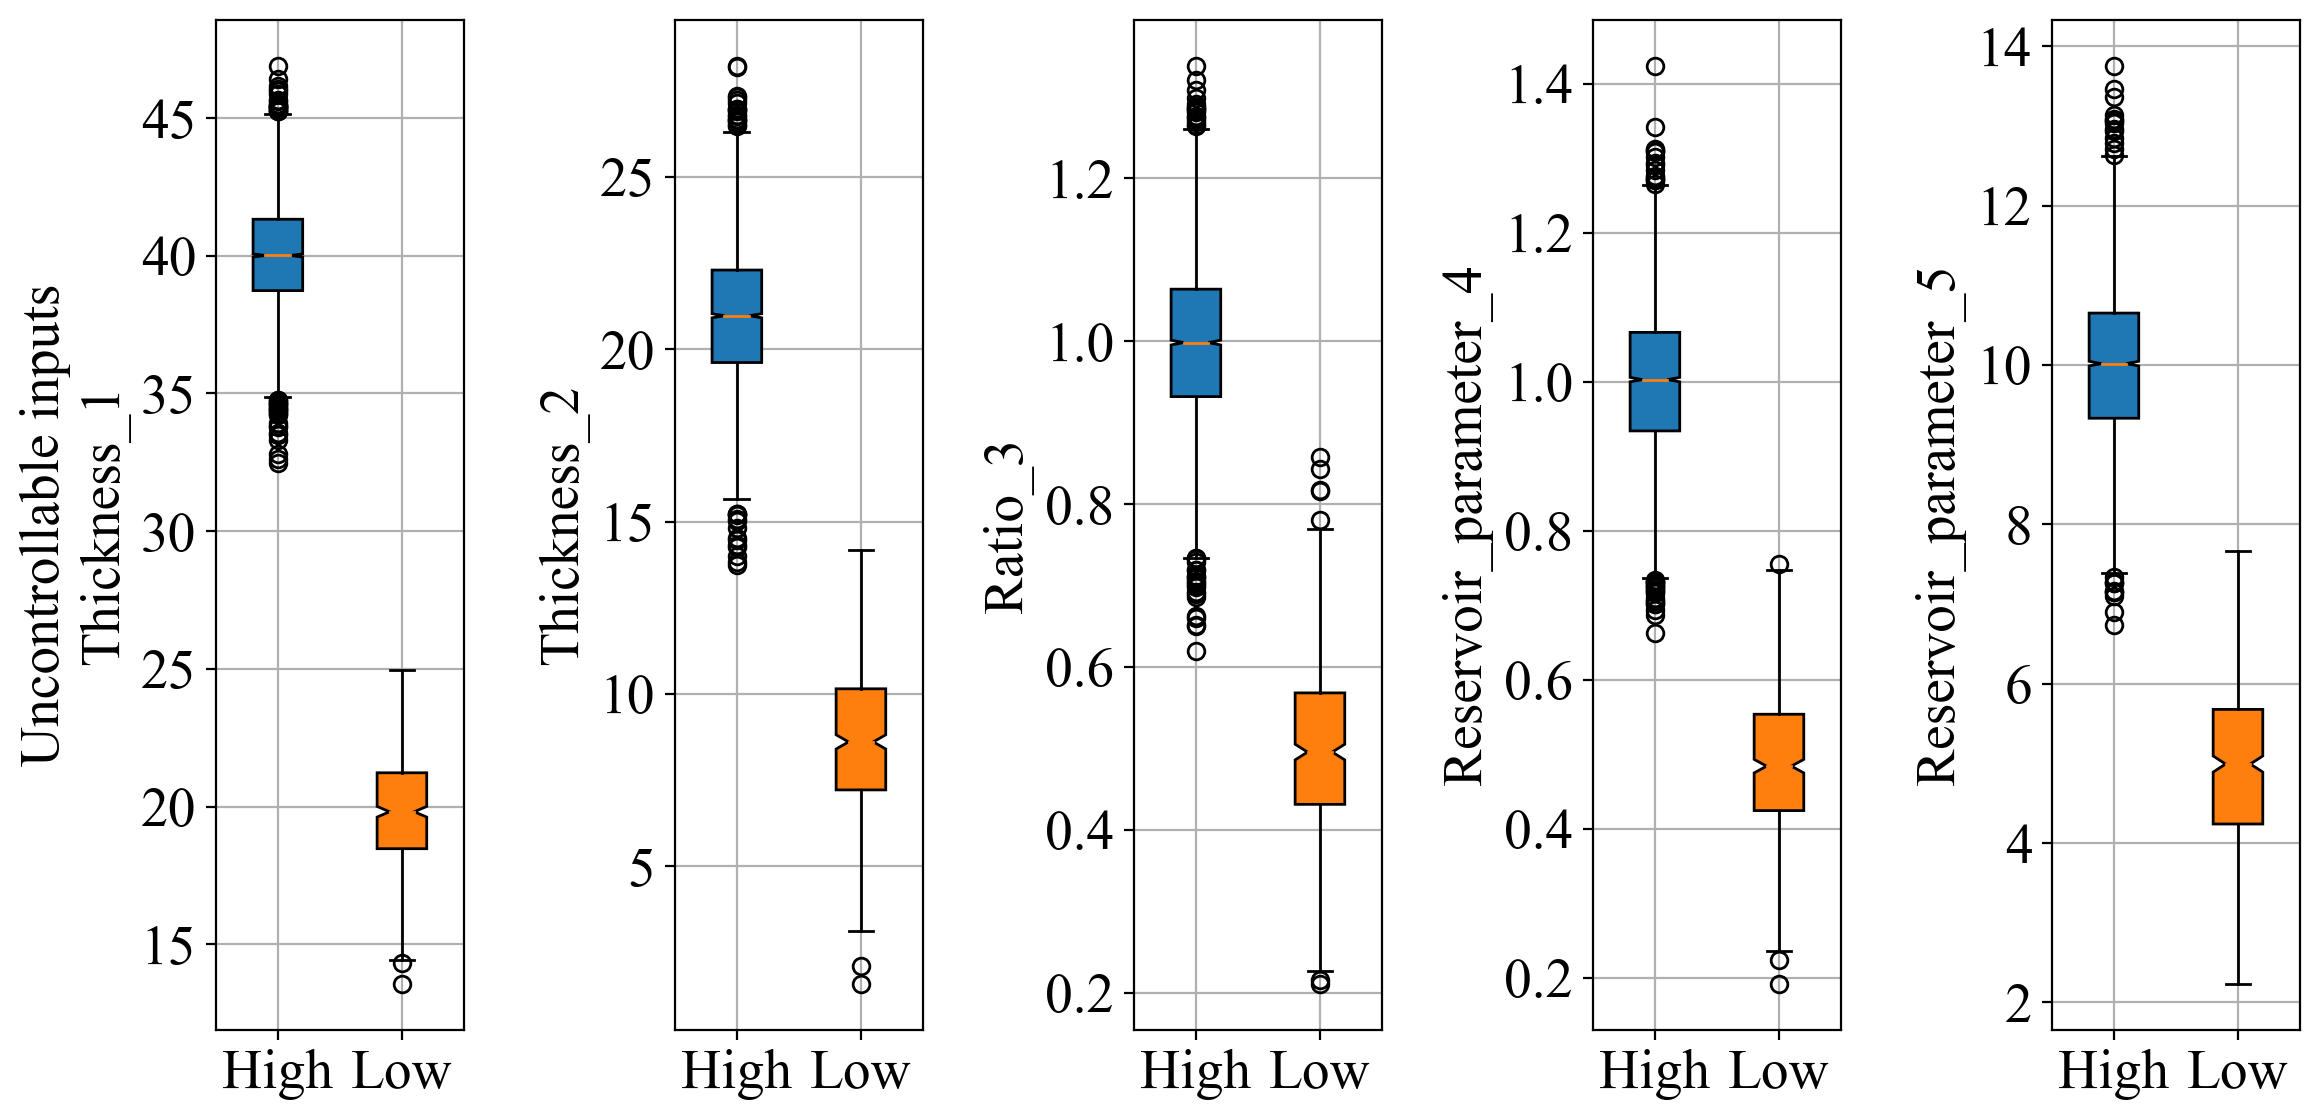

In [66]:
# Creating separate subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6), dpi=200)
# Creating boxplots for each variable
grouped_boxplot(axes[0], df_si_high['uc_1'], df_si_low['uc_1'])
axes[0].set_ylabel('Uncontrollable inputs\nThickness_1')
grouped_boxplot(axes[1], df_si_high['uc_2'], df_si_low['uc_2'])
axes[1].set_ylabel('Thickness_2')
grouped_boxplot(axes[2], df_si_high['uc_3'], df_si_low['uc_3'])
axes[2].set_ylabel('Ratio_3')
grouped_boxplot(axes[3], df_si_high['uc_4'], df_si_low['uc_4'])
axes[3].set_ylabel('Reservoir_parameter_4')
grouped_boxplot(axes[4], df_si_high['uc_5'], df_si_low['uc_5'])
axes[4].set_ylabel('Reservoir_parameter_5')
fig.tight_layout()
plt.show()


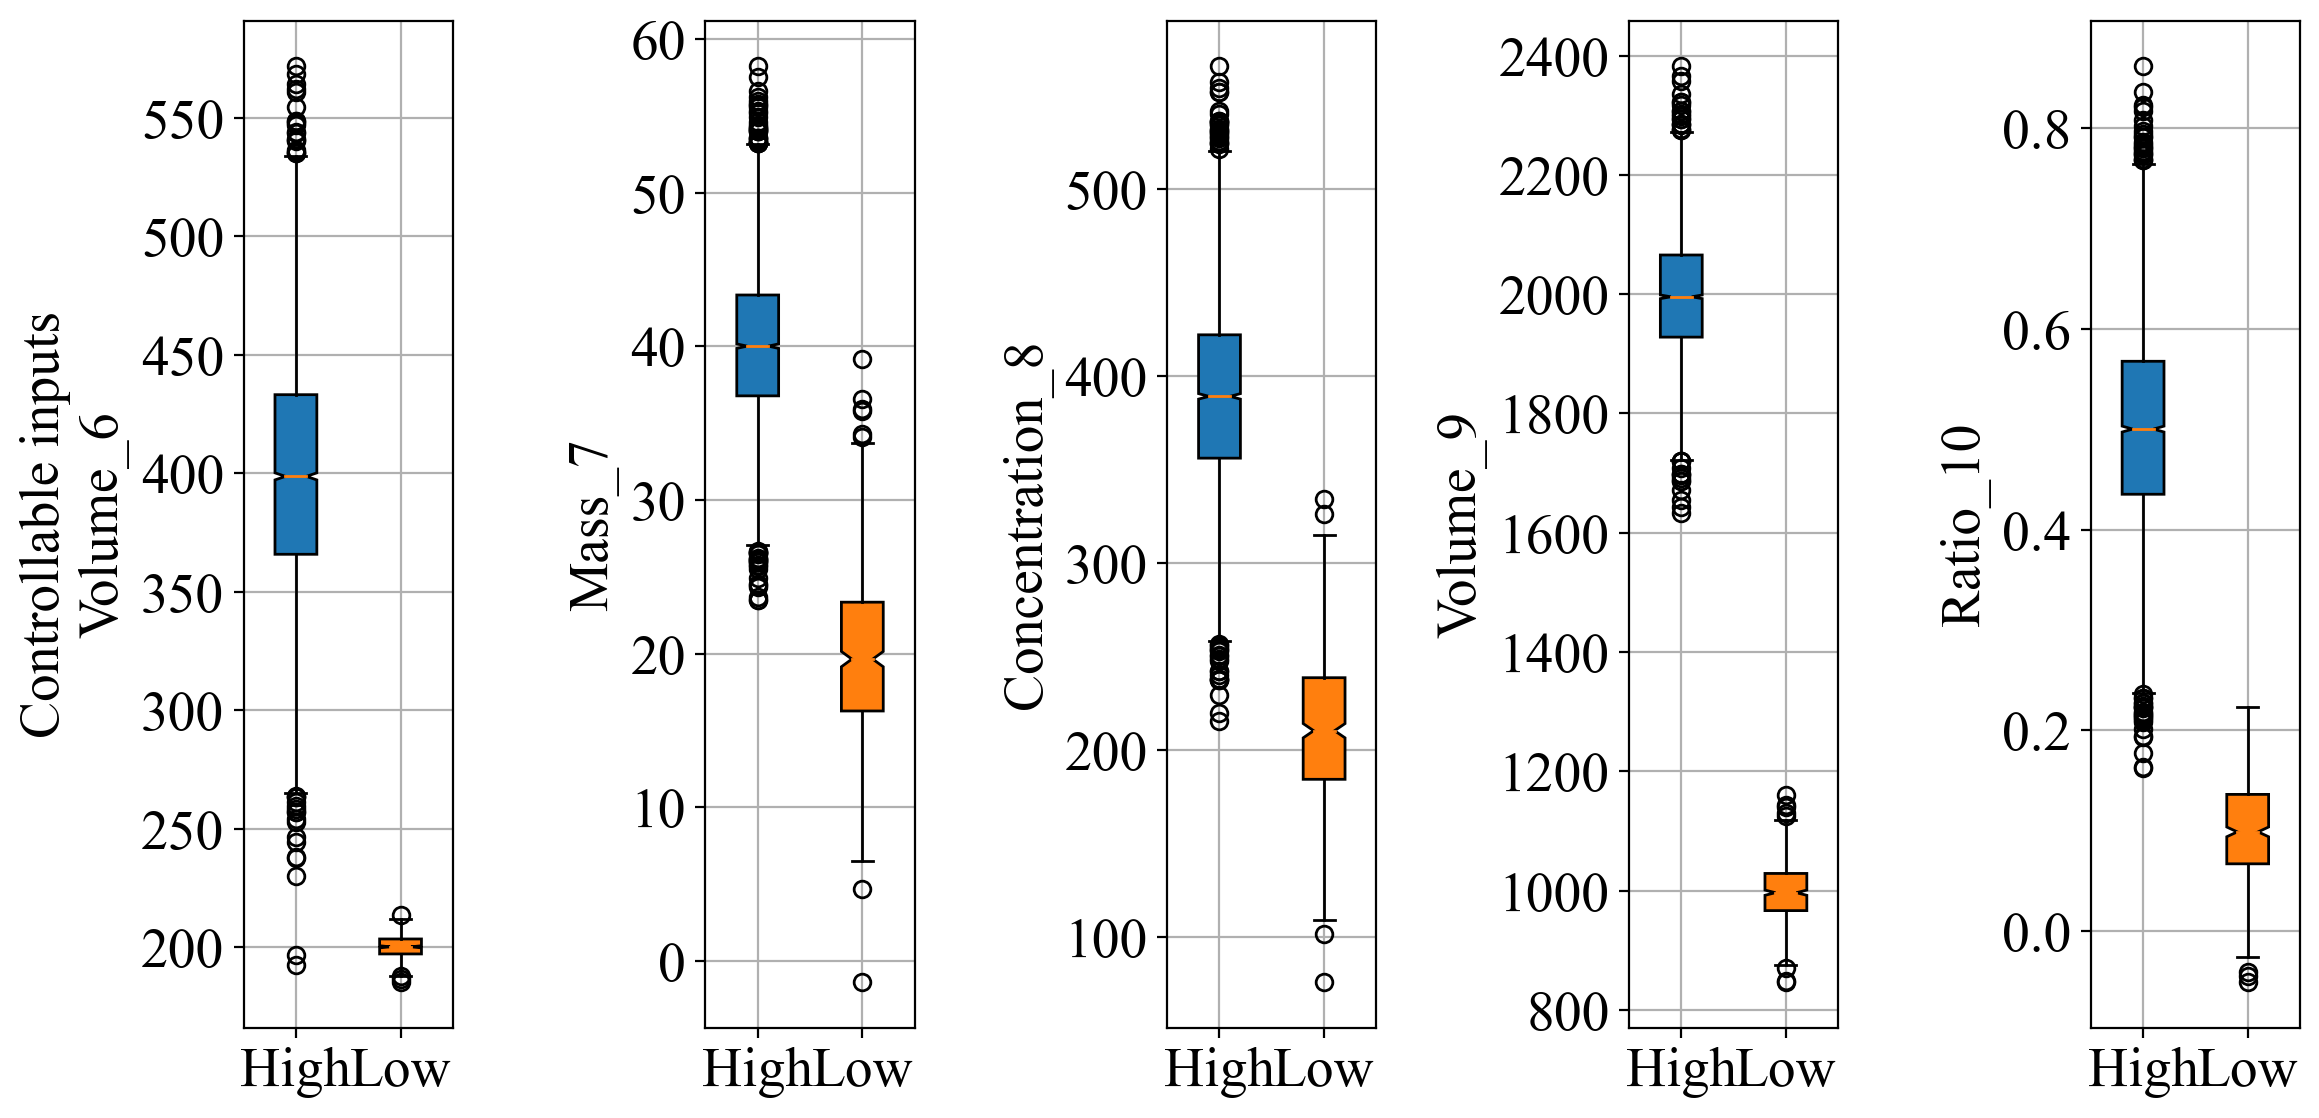

In [67]:
# Creating separate subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6), dpi=200)
# Creating boxplots for each variable
grouped_boxplot(axes[0], df_de_high['c_1'], df_de_low['c_1'])
axes[0].set_ylabel('Controllable inputs\nVolume_6')
grouped_boxplot(axes[1], df_de_high['c_2'], df_de_low['c_2'])
axes[1].set_ylabel('Mass_7')
grouped_boxplot(axes[2], df_de_high['c_3'], df_de_low['c_3'])
axes[2].set_ylabel('Concentration_8')
grouped_boxplot(axes[3], df_de_high['c_4'], df_de_low['c_4'])
axes[3].set_ylabel('Volume_9')
grouped_boxplot(axes[4], df_de_high['c_5'], df_de_low['c_5'])
axes[4].set_ylabel('Ratio_10')
fig.tight_layout()
plt.show()


In [68]:
def single_boxplot(ax, data1):
    # Plotting the boxplot
    bp = ax.boxplot(data1, widths=0.2, positions=[1], patch_artist=True, notch=True)
    # Customizing boxplot colors
    colors = ['#1f77b4']
    # Customizing font to Times New Roman and size
    plt.rc('font', family='Times New Roman', size=20)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    # Setting the x-ticks and labels
    ax.set_xticks([1])
    ax.set_xticklabels(['High'])
    ax.grid(True)

design test data plot

In [75]:
def plot_scatter_test_data(ax, df_high, df_low, column='c_1'):

    # Scatter plot for 'high' data
    ax.scatter(np.arange(len(df_high[column])), df_high[column], label='Test Data_1',marker='o')

    # Scatter plot for 'low' data
    ax.scatter(np.arange(len(df_low[column])), df_low[column], label='Test Data_2',marker='x')

    ax.set_ylabel(column)

    # Customizing font to Times New Roman and size
    plt.rc('font', family='Times New Roman', size=30)

    # Show x index in integer format
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Setting the x-ticks 0,5,10,15,20,25
    ax.set_xticks(np.arange(0, len(df_high[column])+1, 5))



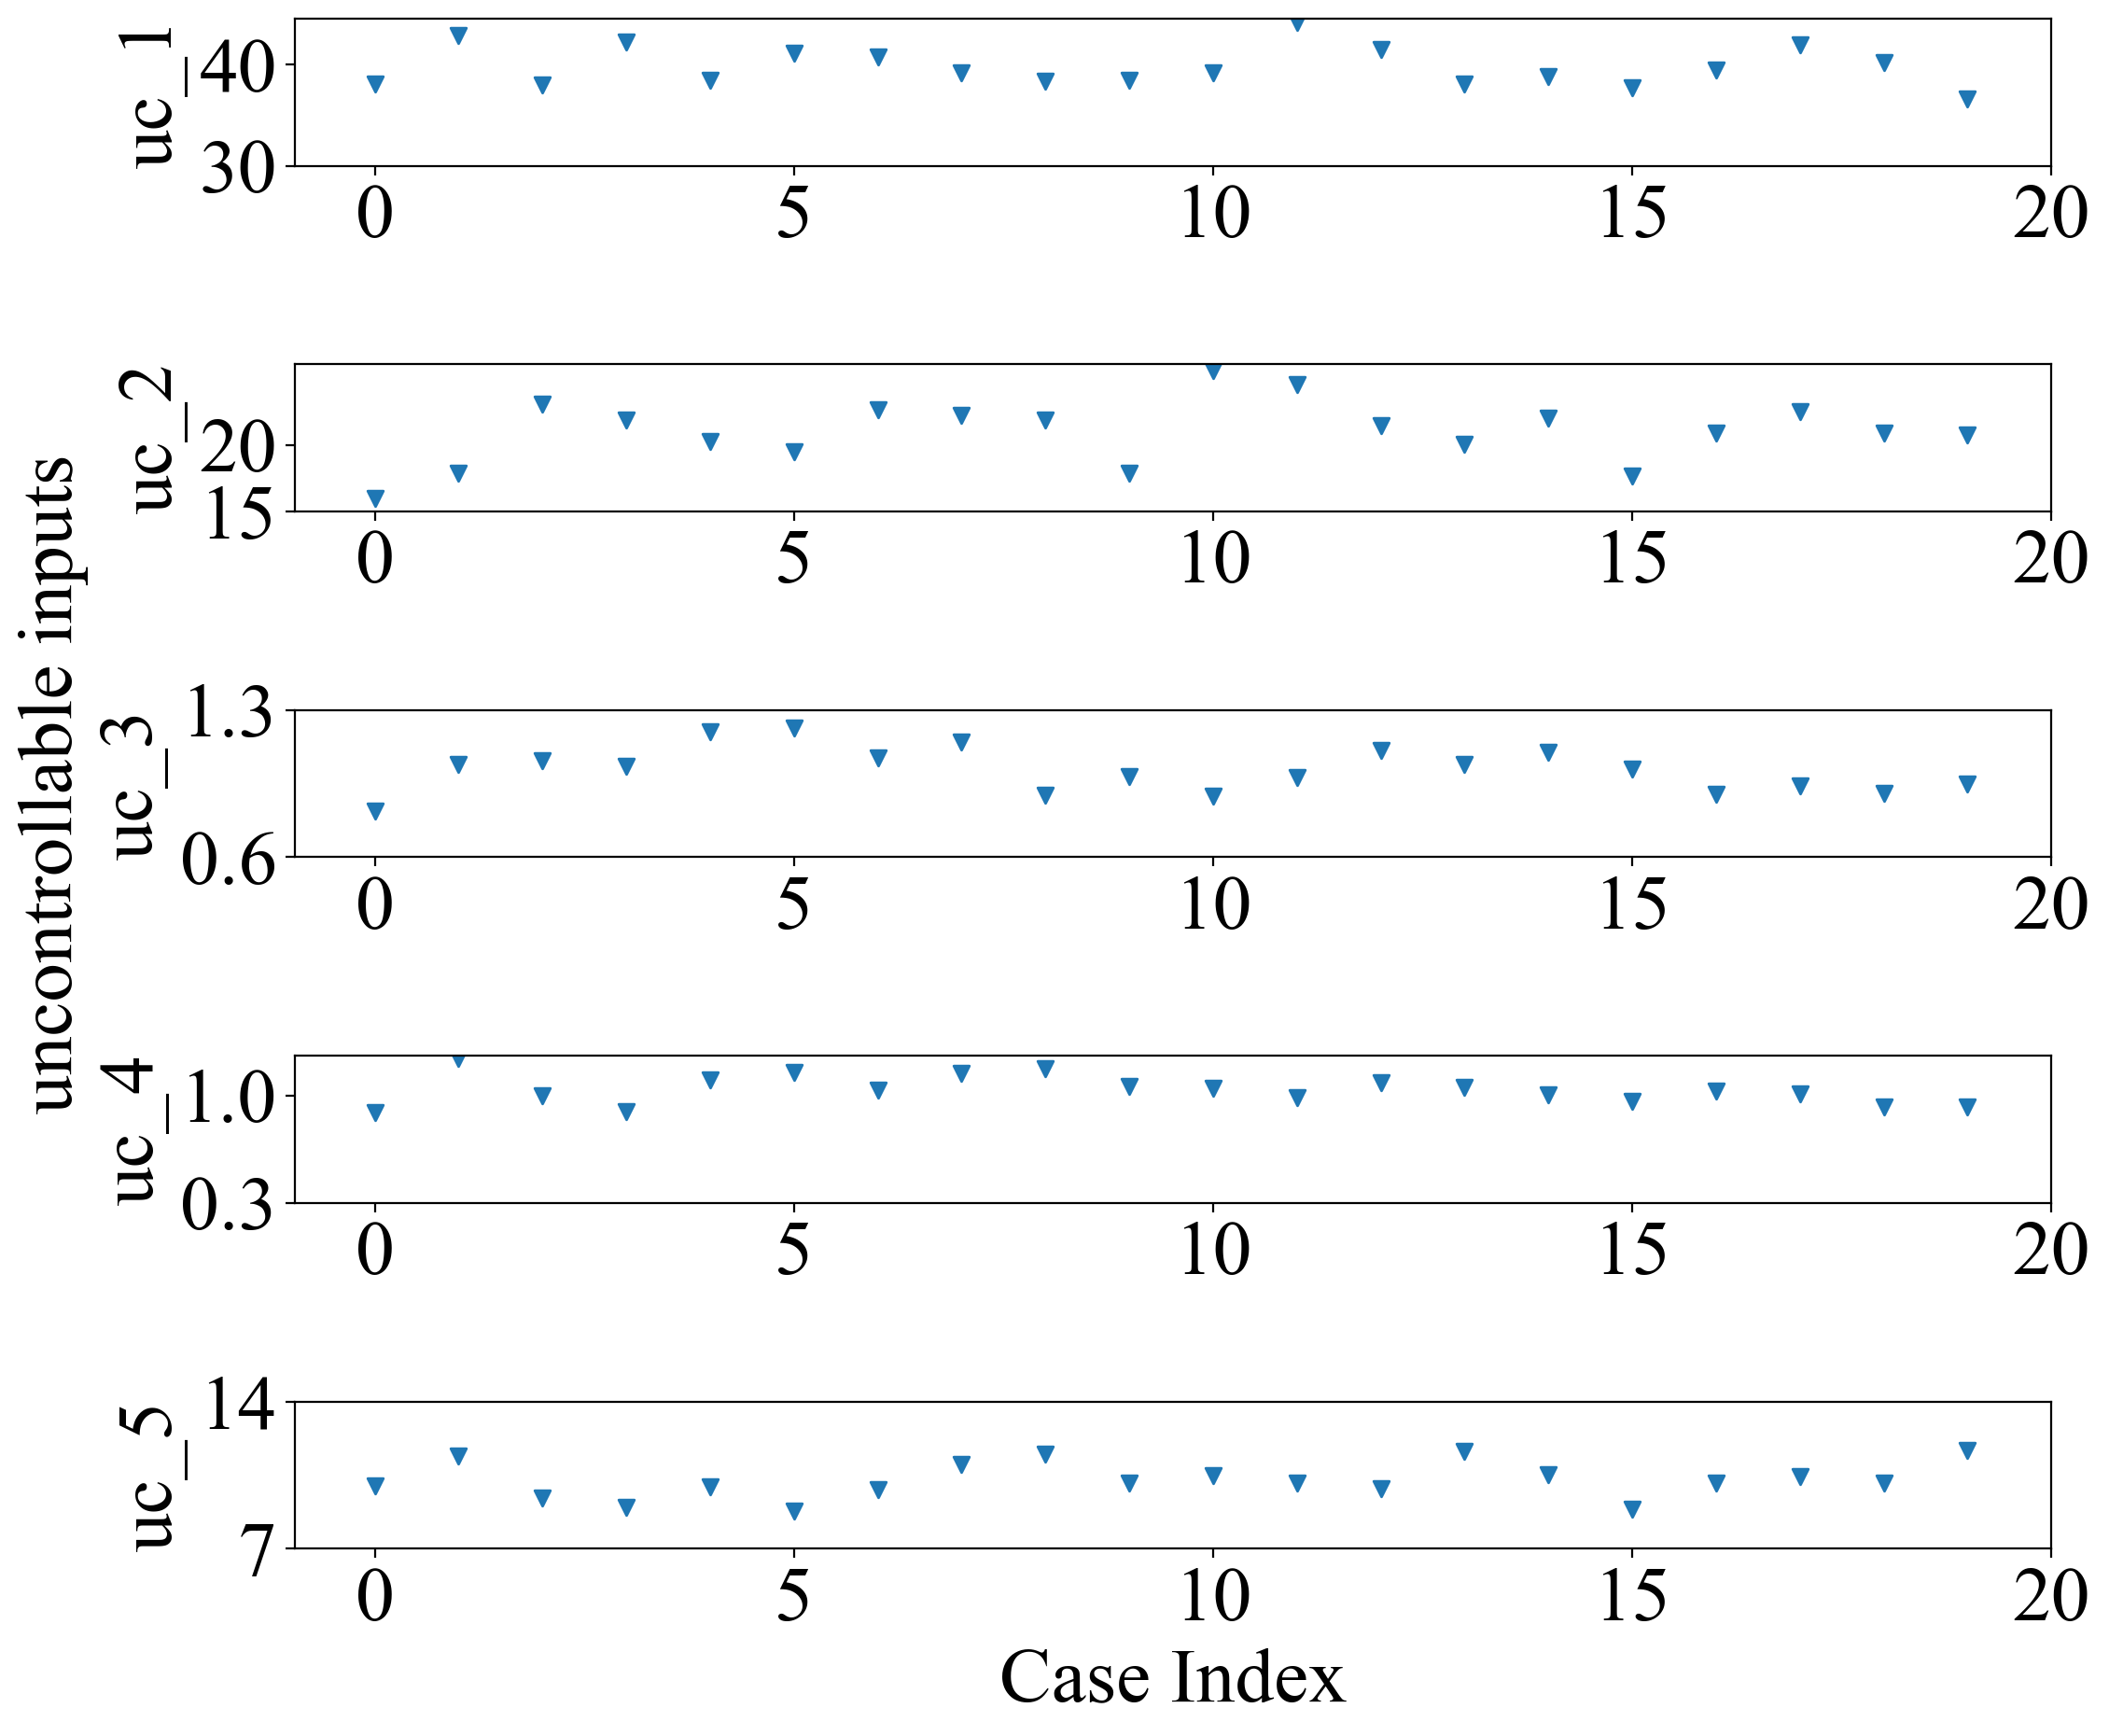

In [77]:
# Creating scatter plot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), dpi=200)
# Scatter plot for 'high' data
ax[0].scatter(np.arange(len(df_si_high_test['uc_1'])), df_si_high_test['uc_1'], label='uc_1',marker = "v")
ax[1].scatter(np.arange(len(df_si_high_test['uc_2'])), df_si_high_test['uc_2'], label='uc_2',marker = "v")
ax[2].scatter(np.arange(len(df_si_high_test['uc_3'])), df_si_high_test['uc_3'], label='uc_3',marker = "v")
ax[3].scatter(np.arange(len(df_si_high_test['uc_4'])), df_si_high_test['uc_4'], label='uc_4',marker = "v")
ax[4].scatter(np.arange(len(df_si_high_test['uc_5'])), df_si_high_test['uc_5'], label='uc_5',marker = "v")

# plot the x-axis
ax[4].set_xlabel('Case Index')

# Show x index in integer format
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Setting the x-ticks 0,5,10,15,20,25
ax[0].set_xticks(np.arange(0, len(df_si_high_test['uc_1'])+1, 5))
ax[0].set_yticks(np.arange(30, 50, 10))
ax[0].set_ylabel('uc_1')
ax[1].set_xticks(np.arange(0, len(df_si_high_test['uc_2'])+1, 5))
ax[1].set_yticks(np.arange(15, 25, 5 ))
ax[1].set_ylabel('uc_2')
ax[2].set_xticks(np.arange(0, len(df_si_high_test['uc_3'])+1, 5))
ax[2].set_yticks(np.arange(0.6, 1.8, 0.7))
ax[2].set_ylabel('uncontrollable inputs\nuc_3')
ax[3].set_xticks(np.arange(0, len(df_si_high_test['uc_4'])+1, 5))
ax[3].set_yticks(np.arange(0.3, 1.7, 0.7))
ax[3].set_ylabel('uc_4')
ax[4].set_xticks(np.arange(0, len(df_si_high_test['uc_5'])+1, 5))
ax[4].set_yticks(np.arange(7, 18, 7))
ax[4].set_ylabel('uc_5')

fig.tight_layout()
plt.show()

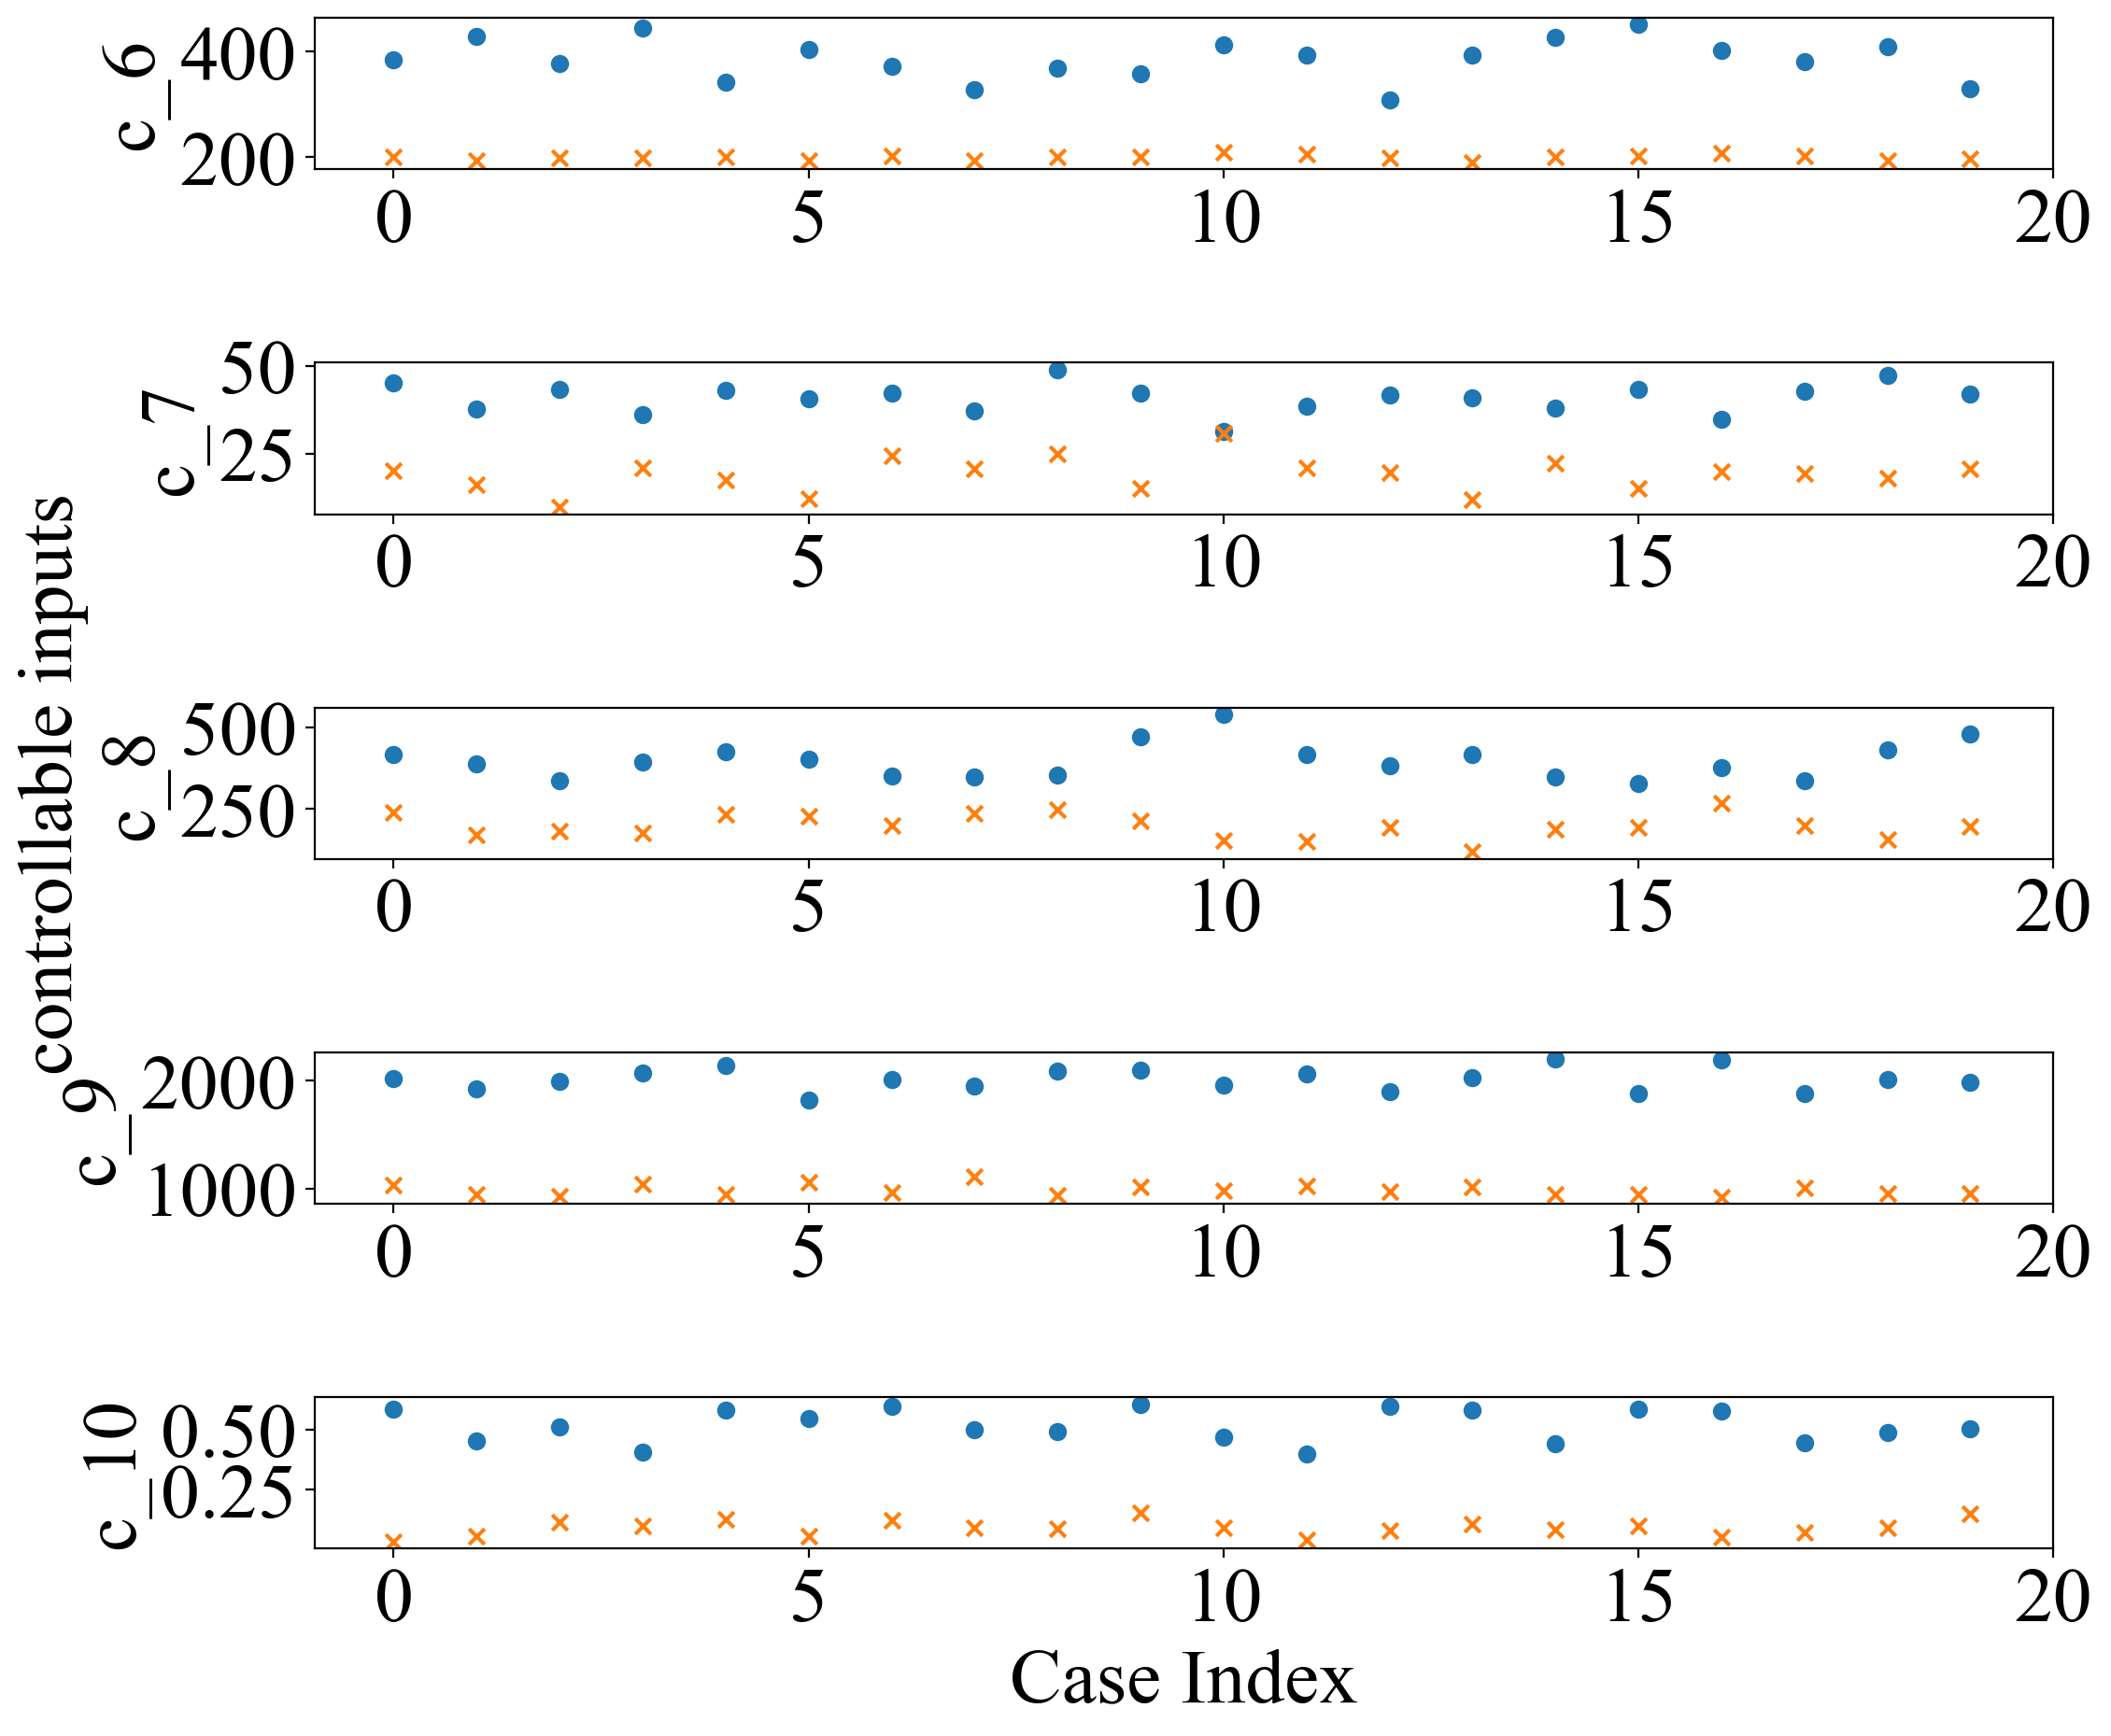

In [78]:
# Creating scatter plot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), dpi=200)
# scatter plot df_de_high_test['d1'], x-axis is the index of the data intager
plot_scatter_test_data(ax[0], df_de_high_test, df_de_low_test, column='c_1')
ax[0].set_ylabel('c_6')
plot_scatter_test_data(ax[1], df_de_high_test, df_de_low_test, column='c_2')
ax[1].set_ylabel('c_7')
plot_scatter_test_data(ax[2], df_de_high_test, df_de_low_test, column='c_3')
ax[2].set_ylabel('controllable inputs\nc_8')
plot_scatter_test_data(ax[3], df_de_high_test, df_de_low_test, column='c_4')
ax[3].set_ylabel('c_9')
plot_scatter_test_data(ax[4], df_de_high_test, df_de_low_test, column='c_5')
ax[4].set_ylabel('c_10')


# plot the x-axis
ax[4].set_xlabel('Case Index')
fig.tight_layout()
plt.show()


In [79]:
production_low = np.random.uniform(low=200, high=500, size= num_low)
production_high = np.random.uniform(low=400, high=1000, size= num_high)

df_prod_low = pd.DataFrame({'production': production_low})
df_prod_high = pd.DataFrame({'production': production_high})

In [80]:
def grouped_boxplot_horizontal(ax, data1, data2):
    # Combining the data
    data = [data1, data2]
    # Creating positions for each boxplot, flipping the order to have 'High' above 'Low'
    positions = [2, 1]  # 'High' at position 2, 'Low' at position 1
    # Plotting the boxplots horizontally
    bp = ax.boxplot(data, widths=0.4, positions=positions, patch_artist=True, notch=True, vert=False)
    # Customizing boxplot colors
    colors = ['#1f77b4', '#ff7f0e']
    # Customizing font to Times New Roman and size
    plt.rc('font', family='Times New Roman', size=20)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    # Setting the y-ticks and labels (since the boxplot is horizontal)
    ax.set_yticks([2, 1])  # Adjusted for the flipped order
    ax.set_yticklabels(['High', 'Low'])
    ax.grid(True)

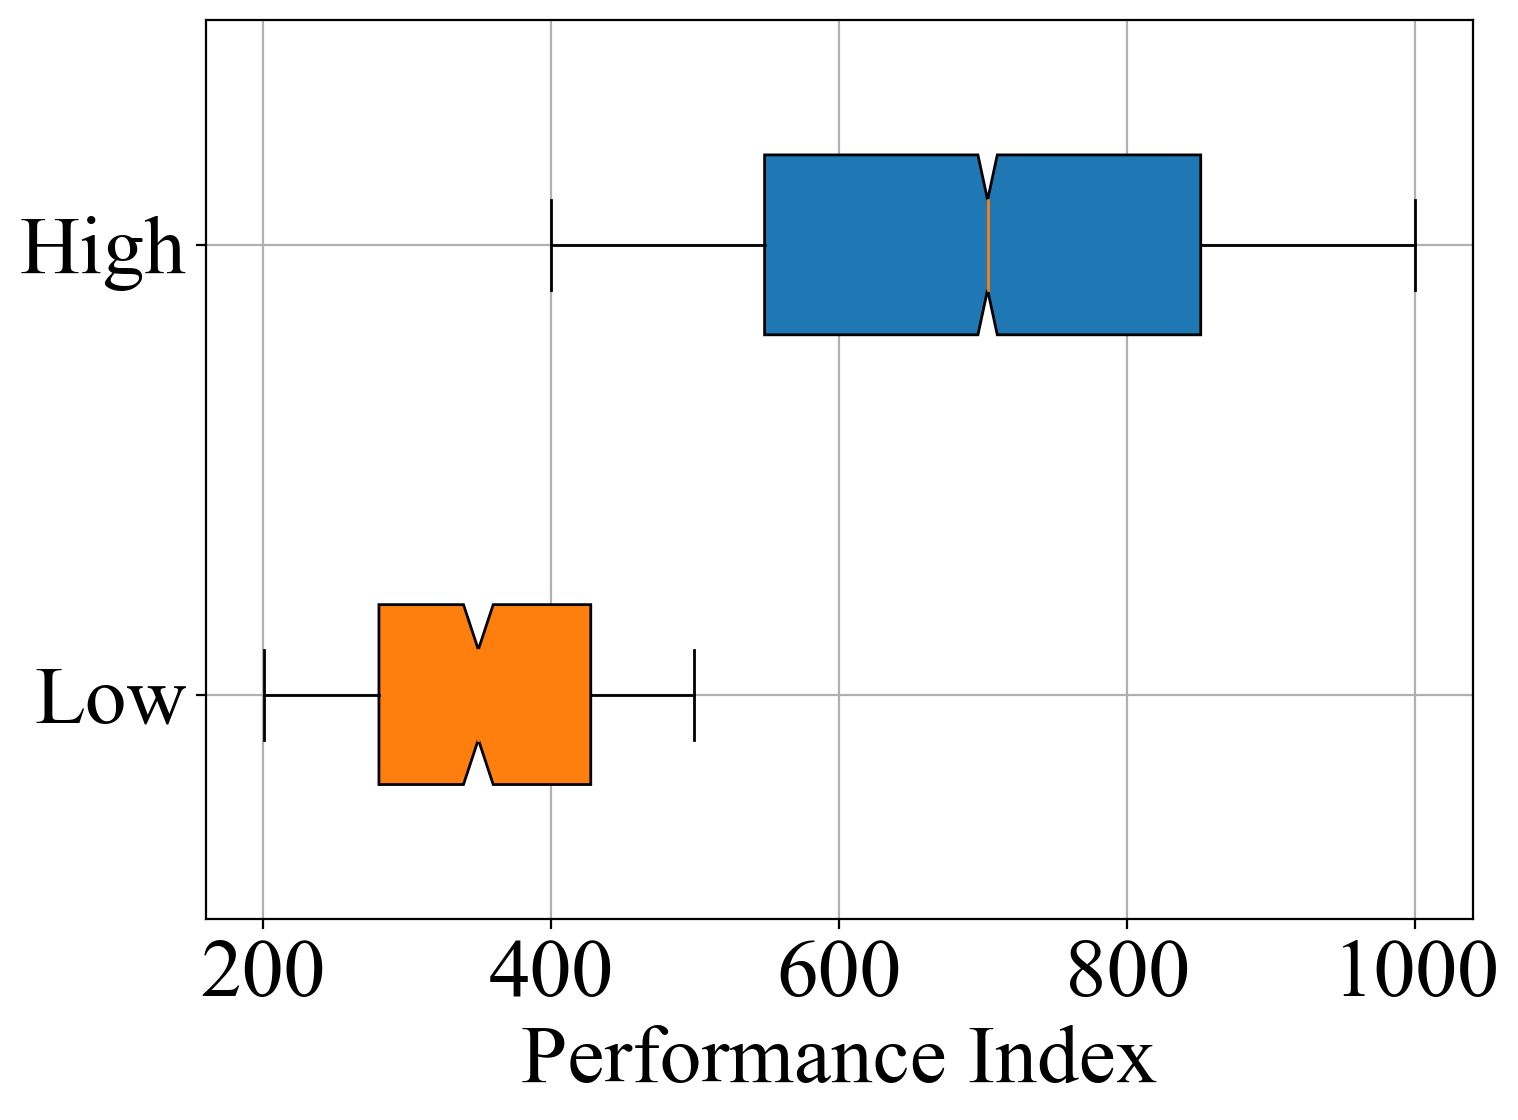

In [81]:
# boxplot for production
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=200)
# Creating boxplots for each variable
grouped_boxplot_horizontal(axes, df_prod_high['production'], df_prod_low['production'])
axes.set_xlabel('Performance Index')
# rename the x-axis
fig.tight_layout()
plt.show()

In [82]:
train_low = pd.concat([df_de_low, df_si_high], axis=1)
train_high = pd.concat([df_de_high, df_si_high], axis=1)
test_low = pd.concat([df_de_low_test, df_si_high_test], axis=1)
test_high = pd.concat([df_de_high_test, df_si_high_test], axis=1)

test_low.head()

,c_1,c_2,c_3,c_4,c_5,uc_1,uc_2,uc_3,uc_4,uc_5
0,199.356945,20.082208,239.689775,1038.612043,0.034677,38.095748,16.008954,0.821997,0.887386,9.977510
1,193.883108,16.296626,171.232266,944.824919,0.057339,42.882477,17.872639,1.043209,1.237672,11.426004
2,198.062554,9.770293,182.789816,934.116921,0.115339,38.000318,23.073275,1.058433,0.995949,9.398294
3,197.779107,21.000667,175.312154,1045.816066,0.099302,42.236649,21.878725,1.031833,0.895158,8.992705
4,199.765003,17.460443,232.692220,950.726747,0.129398,38.486505,20.252523,1.197818,1.101676,9.956594


In [83]:
test_high.head()

,c_1,c_2,c_3,c_4,c_5,uc_1,uc_2,uc_3,uc_4,uc_5
0,384.454370,45.260339,416.877169,2020.216770,0.585058,38.095748,16.008954,0.821997,0.887386,9.977510
1,429.166665,37.612909,389.255216,1925.392716,0.454171,42.882477,17.872639,1.043209,1.237672,11.426004
2,376.860464,43.416307,337.713489,1993.320520,0.509717,38.000318,23.073275,1.058433,0.995949,9.398294
3,444.899078,36.168822,393.424043,2070.022015,0.408026,42.236649,21.878725,1.031833,0.895158,8.992705
4,341.305963,43.051207,424.766471,2137.866836,0.579768,38.486505,20.252523,1.197818,1.101676,9.956594


# Autoencoder

In [84]:
# Assuming 'train_high' is your DataFrame
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(train_high)

# Split the normalized data into training and testing sets
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Adjusted model architecture for small input size
input_size = X_train.shape[1]

In [85]:
# Clear Keras session
K.clear_session()

# Refined model architecture
input_layer = Input(shape=(input_size,))
x = Dense(64, kernel_regularizer=l2(0.001))(input_layer)  # Increased neurons and L2 regularization
x = PReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer=l2(0.001))(x)
x = PReLU()(x)
x = BatchNormalization()(x)
x = Dense(64, kernel_regularizer=l2(0.001))(x)
x = PReLU()(x)
x = Dropout(0.3)(x)
output_layer = Dense(input_size, activation='sigmoid')(x)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Optimizer with adjusted parameters
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

autoencoder.compile(optimizer=optimizer, loss='mae')

# Early Stopping with modified patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model fitting with learning rate scheduler
autoencoder.fit(X_train, X_train,
                epochs=1000,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[early_stopping])


Epoch 1/1000
32/32 [==============================] - 2s 12ms/step - loss: 0.2452 - val_loss: 0.1951
Epoch 2/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1858 - val_loss: 0.1803
Epoch 3/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1564 - val_loss: 0.1673
Epoch 4/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1356 - val_loss: 0.1547
Epoch 5/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1194 - val_loss: 0.1438
Epoch 6/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.1080 - val_loss: 0.1343
Epoch 7/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0978 - val_loss: 0.1260
Epoch 8/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0893 - val_loss: 0.1182
Epoch 9/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0826 - val_loss: 0.1115
Epoch 10/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0771 - val_loss: 0.105

In [86]:
# Evaluate the model on the test set
test_loss = autoencoder.evaluate(X_test, X_test)
print(f'Test loss (mean absolute error): {test_loss}')


32/32 [==============================] - 0s 2ms/step - loss: 0.0269
Test loss (mean absolute error): 0.026850765570998192


In [87]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 p_re_lu (PReLU)             (None, 64)                64        
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                             

# test the model

test_data1 with high design parameters

In [88]:
test_high.head()

,c_1,c_2,c_3,c_4,c_5,uc_1,uc_2,uc_3,uc_4,uc_5
0,384.454370,45.260339,416.877169,2020.216770,0.585058,38.095748,16.008954,0.821997,0.887386,9.977510
1,429.166665,37.612909,389.255216,1925.392716,0.454171,42.882477,17.872639,1.043209,1.237672,11.426004
2,376.860464,43.416307,337.713489,1993.320520,0.509717,38.000318,23.073275,1.058433,0.995949,9.398294
3,444.899078,36.168822,393.424043,2070.022015,0.408026,42.236649,21.878725,1.031833,0.895158,8.992705
4,341.305963,43.051207,424.766471,2137.866836,0.579768,38.486505,20.252523,1.197818,1.101676,9.956594


In [89]:
test_low.head()

,c_1,c_2,c_3,c_4,c_5,uc_1,uc_2,uc_3,uc_4,uc_5
0,199.356945,20.082208,239.689775,1038.612043,0.034677,38.095748,16.008954,0.821997,0.887386,9.977510
1,193.883108,16.296626,171.232266,944.824919,0.057339,42.882477,17.872639,1.043209,1.237672,11.426004
2,198.062554,9.770293,182.789816,934.116921,0.115339,38.000318,23.073275,1.058433,0.995949,9.398294
3,197.779107,21.000667,175.312154,1045.816066,0.099302,42.236649,21.878725,1.031833,0.895158,8.992705
4,199.765003,17.460443,232.692220,950.726747,0.129398,38.486505,20.252523,1.197818,1.101676,9.956594


In [90]:
# Scale the new dataset using the same scaler instance
high_test_scaled = scaler.transform(test_high)

# Rebuild with the autoencoder
high_test_rebuilt = autoencoder.predict(high_test_scaled)

# Calculate the loss 
high_test_loss = np.abs(high_test_scaled - high_test_rebuilt)
# Calculate the mean loss
high_test_loss_mean = np.mean(high_test_loss)
print(f'Test loss (mean absolute error) on new data: {high_test_loss_mean}')


1/1 [==============================] - 0s 169ms/step
Test loss (mean absolute error) on new data: 0.024583658291663334


In [91]:
# get the loss of each data
high_test_loss_each = []
for i in range(len(high_test_loss)):
    high_test_loss_each.append(high_test_loss[i].mean())
high_test_loss_list = np.array(high_test_loss_each)
print(high_test_loss_list)

[0.03628937 0.02997438 0.01895113 0.01027061 0.02952454 0.02757906
 0.01691879 0.02882375 0.03181603 0.02453931 0.04181157 0.02376061
 0.02493696 0.02050158 0.01657442 0.0214159  0.01685091 0.0174031
 0.01921219 0.03451895]


test_data2 with low design parameters

In [92]:
# check the low data
low_test_scaled = scaler.transform(test_low)

# Predict with the autoencoder
low_test_rebuilt = autoencoder.predict(low_test_scaled)

# Calculate the loss 
low_test_loss = np.abs(low_test_scaled - low_test_rebuilt)
# Calculate the mean loss
low_test_loss_mean = np.mean(low_test_loss)
print(f'Test loss (mean absolute error) on new data: {low_test_loss_mean}')

1/1 [==============================] - 0s 26ms/step
Test loss (mean absolute error) on new data: 0.21514694280220986


In [93]:
# get the loss of each data
low_test_loss_each = []
for i in range(len(low_test_loss)):
    low_test_loss_each.append(np.mean(low_test_loss[i]))
low_test_loss_each = np.array(low_test_loss_each)
print(low_test_loss_each)

[0.20555513 0.23702285 0.24076358 0.1878718  0.20557616 0.20613173
 0.19569516 0.19874186 0.22022738 0.20149998 0.23111325 0.23005195
 0.20732235 0.25289934 0.22060726 0.21571999 0.19967766 0.20809237
 0.21809014 0.22027892]


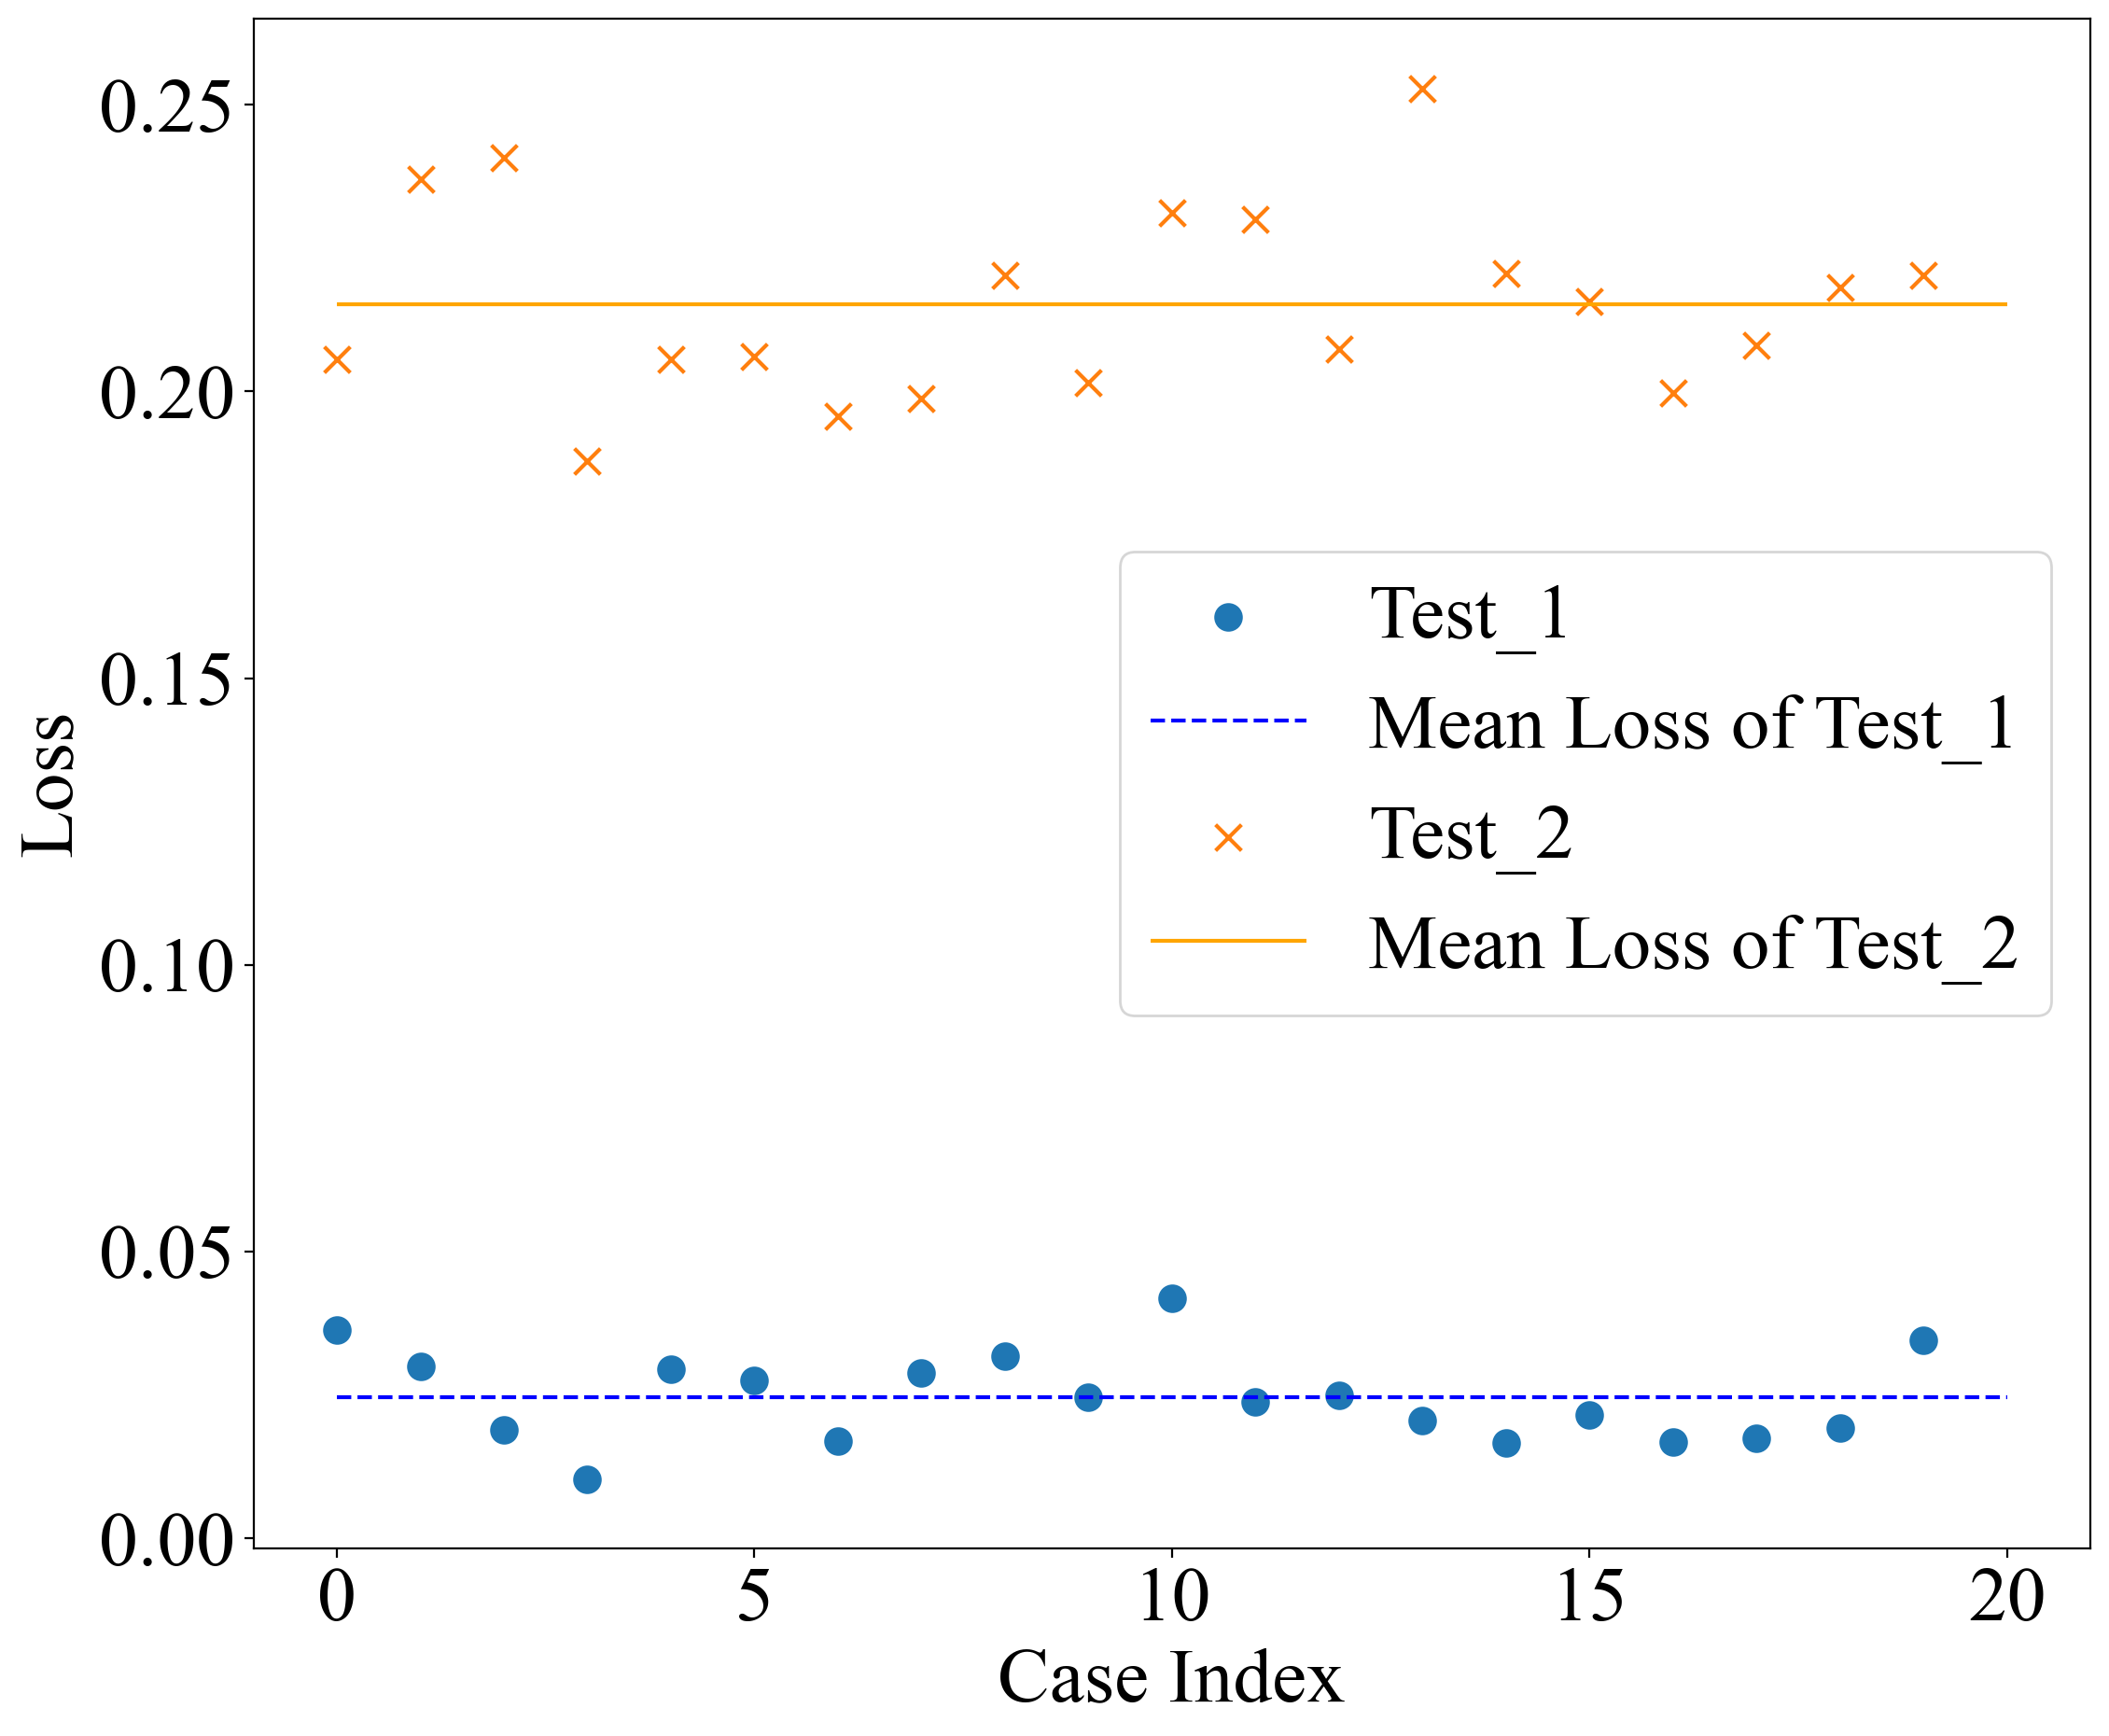

In [96]:
# scatter plot the high_test_loss and low_test_loss
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), dpi=200)
ax.scatter(np.arange(len(high_test_loss_each)), high_test_loss_each, label='Test_1',marker='o',s=100)
# horizontal line for the mean loss
ax.hlines(high_test_loss_mean, xmin=0, xmax=len(high_test_loss_each), color='b', linestyles='dashed',label='Mean Loss of Test_1')

ax.scatter(np.arange(len(low_test_loss_each)), low_test_loss_each, label='Test_2',marker='x',s=100)

ax.hlines(low_test_loss_mean, xmin=0, xmax=len(low_test_loss_each), color='orange', linestyles='solid',label='Mean Loss of Test_2')

ax.set_ylabel('Loss')
ax.set_xlabel('Case Index')
ax.legend()

# font to Times New Roman and size
plt.rc('font', family='Times New Roman', size=30)
fig.tight_layout()
plt.show()

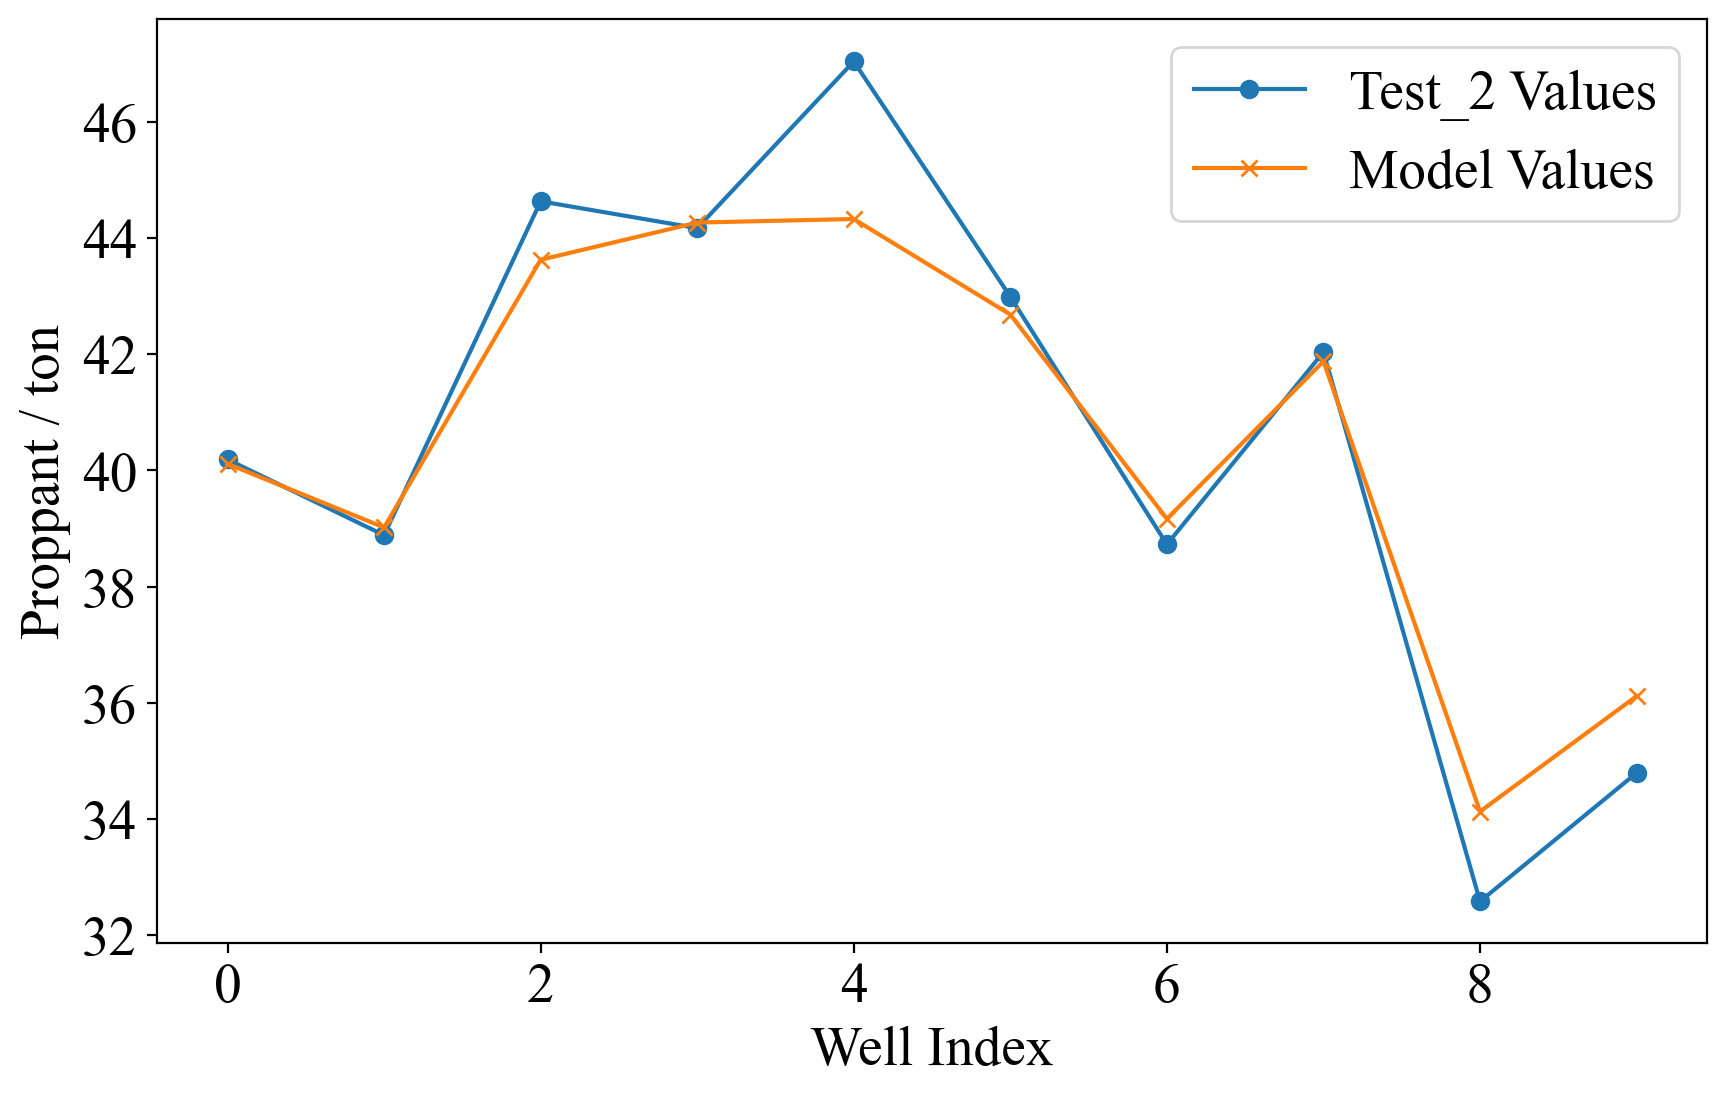

In [30]:
# Inverse transform the original scaled data
original_high_data = scaler.inverse_transform(check_high_test_scaled)

# Inverse transform the predicted data
predicted_high_data = scaler.inverse_transform(predicted_high_test)

# pick the first 10 rows to check
original_high_data = original_high_data[:10]
predicted_high_data = predicted_high_data[:10]

# Plotting
plt.figure(figsize=(10, 6), dpi=200)

# Assuming the data has multiple features, you might want to plot a specific feature. 
# scatter plot
plt.plot(np.arange(len(original_high_data)), original_high_data[:,1], label='Test_2 Values',marker='o')
plt.plot(np.arange(len(predicted_high_data)), predicted_high_data[:,1], label='Model Values',marker='x')

# plt.title('Comparison of True and Predicted Values')
plt.xlabel('Well Index')
plt.ylabel('Proppant / ton')
plt.legend()
plt.show()